## 3) Machine learning

### Predicting Wine Type (Red or White)

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn import svm,tree
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import NearestNeighbors
from sklearn.exceptions import DataConversionWarning



sns.set(style='whitegrid')
%matplotlib inline

In [2]:
#load both data sets
#the files are using semicolons as separators
data_rw = pd.read_csv('winequality-red.csv', sep=';')
data_ww = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
#Adding type column to distinguish between red and white wines
data_rw.insert(0, 'type', 'red')
data_ww.insert(0, 'type', 'white')

In [4]:
#Sanity check
data_rw.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data_ww.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,white,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [6]:
#Merging both datasets
wines = data_rw.append(data_ww, ignore_index=True)

In [7]:
#Confirming datsets have merged
wines.shape

(6497, 13)

In [8]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [9]:
wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
wines['quality class'] = wines.quality.apply(lambda q: 'low' if q <= 5 \
                                             else 'high' if q > 7 else 'medium')

In [11]:
# create a label (category) encoder object
le = LabelEncoder()

# fit the encoder to dataframe column and return encoded labels (transferred to integers)
y_type = le.fit_transform(wines.type.values) # 0 - Red ; 1 - White

# add a new column "color" with normalized labels
# it will be used later as the wine type target variable (1st research question)
wines['color'] = y_type

In [12]:
wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality class,color
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,0
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,0
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,0
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,0
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,0


### Extracting features & target (preparing for train/test/split)

In [13]:
features = wines.drop(['type','quality','quality class','color'], axis=1).columns
X = wines[features].copy()

In [14]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [15]:
y = wines.color.copy()

In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: color, dtype: int32

In [17]:
wines.groupby('color').color.count()

color
0    1599
1    4898
Name: color, dtype: int64

### Logistric regression

In [18]:
#Setting up train/test/split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=77,stratify=y)

In [19]:
# Create a modeling pipeline with the standard scaler and a model
pipeline = Pipeline([
    ('scl',StandardScaler()),
    ('lr',LogisticRegression(random_state=77))
])

In [20]:
# List tunable parameters
print(pipeline.get_params())

{'memory': None, 'steps': [('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=77, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))], 'scl': StandardScaler(copy=True, with_mean=True, with_std=True), 'lr': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=77, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), 'scl__copy': True, 'scl__with_mean': True, 'scl__with_std': True, 'lr__C': 1.0, 'lr__class_weight': None, 'lr__dual': False, 'lr__fit_intercept': True, 'lr__intercept_scaling': 1, 'lr__max_iter': 100, 'lr__multi_class': 'warn', 'lr__n_jobs': None, 'lr__penalty': 'l2', 'lr__random_state': 77, 'lr__so

In [21]:
# Declare parameters to tune
param_grid = {
    'lr__C': [0.1,1, 10, 100],
    'lr__tol': [0.001,0.0001]
}

In [22]:
#Cross validation pipeline
clf = GridSearchCV(pipeline, param_grid, cv=10)

In [23]:
# Fit and tune the model
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=77, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'lr__C': [0.1, 1, 10, 100], 'lr__tol': [0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
# list the best set of parametars found by using CV
clf.best_params_

{'lr__C': 1, 'lr__tol': 0.001}

In [25]:
clf.best_estimator_

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=77, solver='warn',
          tol=0.001, verbose=0, warm_start=False))])

In [26]:
# predict a new set of data
y_pred = clf.predict(X_test)

In [27]:
# evaluate performance of the classifier
target_names = ['red','white']
print(classification_report(y_test,y_pred,target_names=target_names),'\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         red       0.98      0.98      0.98       320
       white       0.99      0.99      0.99       980

   micro avg       0.99      0.99      0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300
 

[[315   5]
 [  6 974]]


Text(341.35217391304354, 0.5, 'True Label')

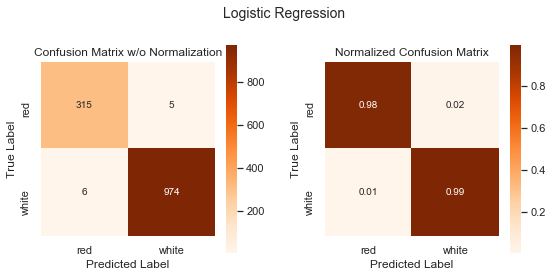

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
f.suptitle('Logistic Regression', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

# confusion matrix without normalization
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat,
            annot=True,
            fmt='d',
            cbar=True,
            square=True,
            cmap='Oranges',
            ax=ax1)

ax1.set_xticklabels(labels=['red','white'])
ax1.set_yticklabels(labels=['red','white'])
ax1.set_title('Confusion Matrix w/o Normalization')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# normalized confusion matrix 
matn = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(matn,
            annot=True,
            fmt='.2f',
            cbar=True,
            square=True,
            cmap='Oranges',
            ax=ax2)
 
ax2.set_xticklabels(labels=['red','white'])
ax2.set_yticklabels(labels=['red','white'])
ax2.set_title('Normalized Confusion Matrix')
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')

In [29]:
# measure accuracy of the classifier
accuracy_score(y_true = y_test, y_pred = y_pred)

0.9915384615384616

### Predicting Quality Class of Wine (low, medium, high)

In [30]:
wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality class,color
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,0
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,0
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,0
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,0
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,0


In [31]:
features = wines.drop(['type','quality','color'], axis=1).columns
X = wines[features].copy()

In [32]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,low


In [33]:
#Train/test/split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=77,stratify=y)

In [34]:
#Setting up Decision Tree
# Create a modeling pipeline with the standard scaler and a model
pipeline = Pipeline([
    ('scl',StandardScaler()),
    ('dtree',DecisionTreeClassifier(random_state=77))
])

In [35]:
#Tune hyperparameters
print(pipeline.get_params())

{'memory': None, 'steps': [('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('dtree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=77,
            splitter='best'))], 'scl': StandardScaler(copy=True, with_mean=True, with_std=True), 'dtree': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=77,
            splitter='best'), 'scl__copy': True, 'scl__with_mean': True, 'scl__with_std': True, 'dtree__class_weight': None, 'dtree__criterion': 'gini',

In [36]:
# Declare parameters to tune
param_grid = {
    'dtree__min_samples_leaf': [2, 3, 4, 6],
    'dtree__max_depth': [8, 9, 10, 12, 13],
    'dtree__criterion': ['gini','entropy'],
    'dtree__class_weight': ['balanced', None]
}

In [41]:
#Cross validation w/ pipeline
clf = GridSearchCV(pipeline, param_grid, cv=10)

In [42]:
# Fit and tune the model
#clf.fit(X_train,y_train)

In [44]:
# list the best set of parametars found by using CV
#clf.best_params_

In [46]:
#clf.best_estimator_

In [48]:
# predict a new set of data
#y_pred = clf.predict(X_test)

In [49]:
# evaluate performance of the classifier
target_names = ['low','medium','high']
print(classification_report(y_test,y_pred,target_names=target_names),'\n')
print(confusion_matrix(y_test,y_pred))

ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter